### Name: Shubham Shetty
### UID: 2018130050
### Batch: B

## Objective
Exploratory Data Analysis

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

import os


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read data
us_census = pd.read_csv('/content/drive/MyDrive/Data Science Tutorials/acs2015_county_data.csv',encoding="windows-1252")

In [5]:
us_census.head() #Show first 5 data

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [6]:
us_census.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CensusId         3220 non-null   int64  
 1   State            3220 non-null   object 
 2   County           3220 non-null   object 
 3   TotalPop         3220 non-null   int64  
 4   Men              3220 non-null   int64  
 5   Women            3220 non-null   int64  
 6   Hispanic         3220 non-null   float64
 7   White            3220 non-null   float64
 8   Black            3220 non-null   float64
 9   Native           3220 non-null   float64
 10  Asian            3220 non-null   float64
 11  Pacific          3220 non-null   float64
 12  Citizen          3220 non-null   int64  
 13  Income           3219 non-null   float64
 14  IncomeErr        3219 non-null   float64
 15  IncomePerCap     3220 non-null   int64  
 16  IncomePerCapErr  3220 non-null   int64  
 17  Poverty       

In [7]:
us_census.County.value_counts
#You can show counts of data values

<bound method IndexOpsMixin.value_counts of 0         Autauga
1         Baldwin
2         Barbour
3            Bibb
4          Blount
          ...    
3215    Vega Baja
3216      Vieques
3217     Villalba
3218      Yabucoa
3219        Yauco
Name: County, Length: 3220, dtype: object>

In [8]:
us_census["State"].unique() #We can show unique datas.

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

In [9]:
us_census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


Text(0.5, 1.0, 'Income Rate Given Region')

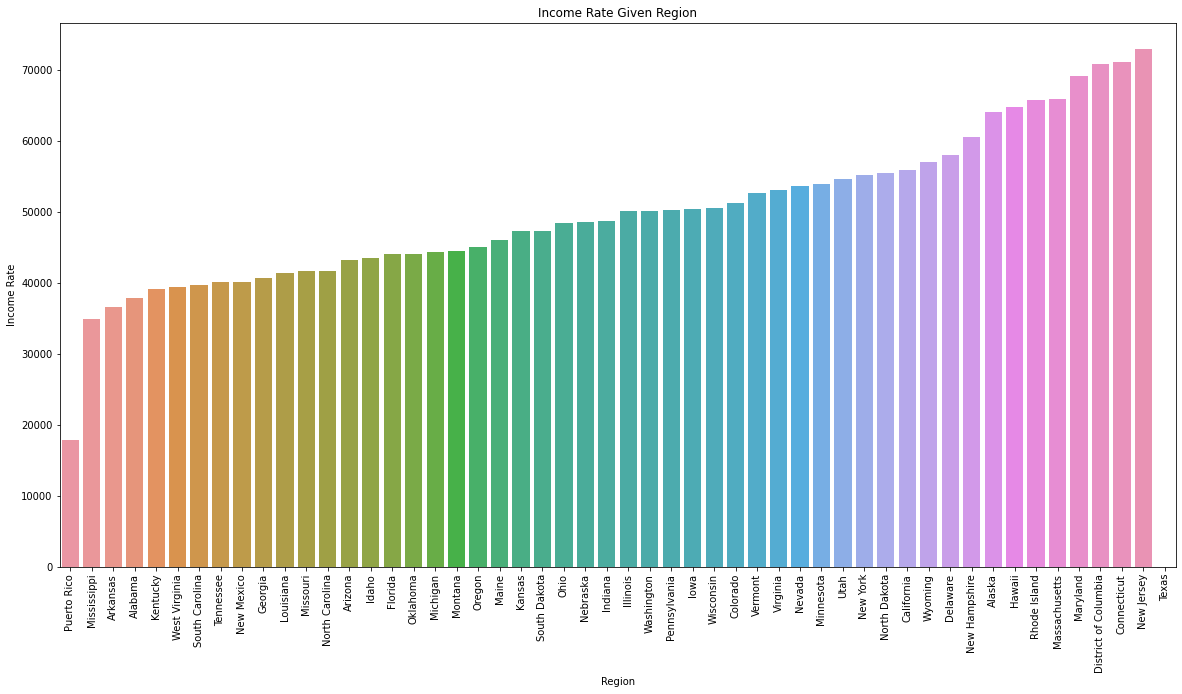

In [10]:
region_list = list(us_census['State'].unique())
region_income_ratio = []
for i in region_list:
    x = us_census[us_census['State']==i]                      #Find the state have how many county
    region_income_rate = sum(x.Income)/len(x)                 #Then calculate sum of income ratio and divided to found above
    region_income_ratio.append(region_income_rate)            #You append to list the state
    
    
#sorting
#Sort the income ratio as from low to high
#If you change the ascending state as False,Sorting will change as from high to low
data = pd.DataFrame({'region_list': region_list,'region_income_ratio':region_income_ratio})
new_index = (data['region_income_ratio'].sort_values(ascending=True)).index.values
sorted_data = data.reindex(new_index)

# visualization
plt.figure(figsize=(20,10))
sns.barplot(x=sorted_data['region_list'], y=sorted_data['region_income_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('Region')
plt.ylabel('Income Rate')
plt.title('Income Rate Given Region')

Text(0.5, 1.0, 'Most common 10 Name of County')

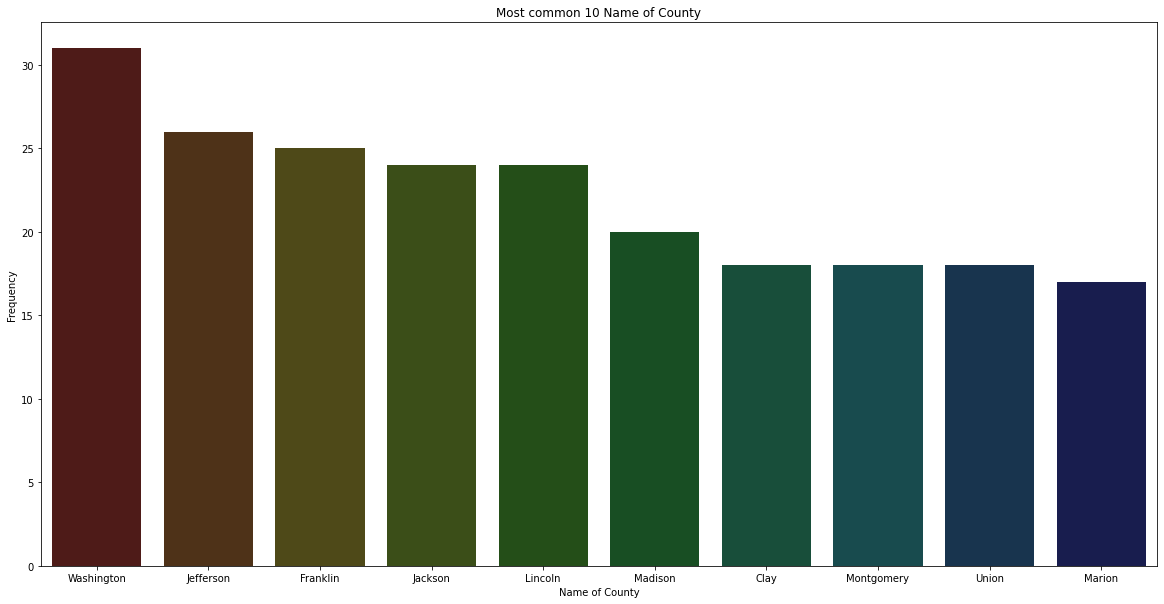

In [11]:
# Most common 10 county name                 
loc_list =us_census['County']                      
loc_count = Counter(loc_list)         
most_common_locations = loc_count.most_common(10)  
x,y = zip(*most_common_locations)
x,y = list(x),list(y)
plt.figure(figsize=(20,10))
ax= sns.barplot(x=x, y=y,palette =sns.hls_palette(14, l=.2, s=.7))
plt.xlabel('Name of County')
plt.ylabel('Frequency')
plt.title('Most common 10 Name of County')

Text(0.5, 1.0, 'Poverty Rate Given State')

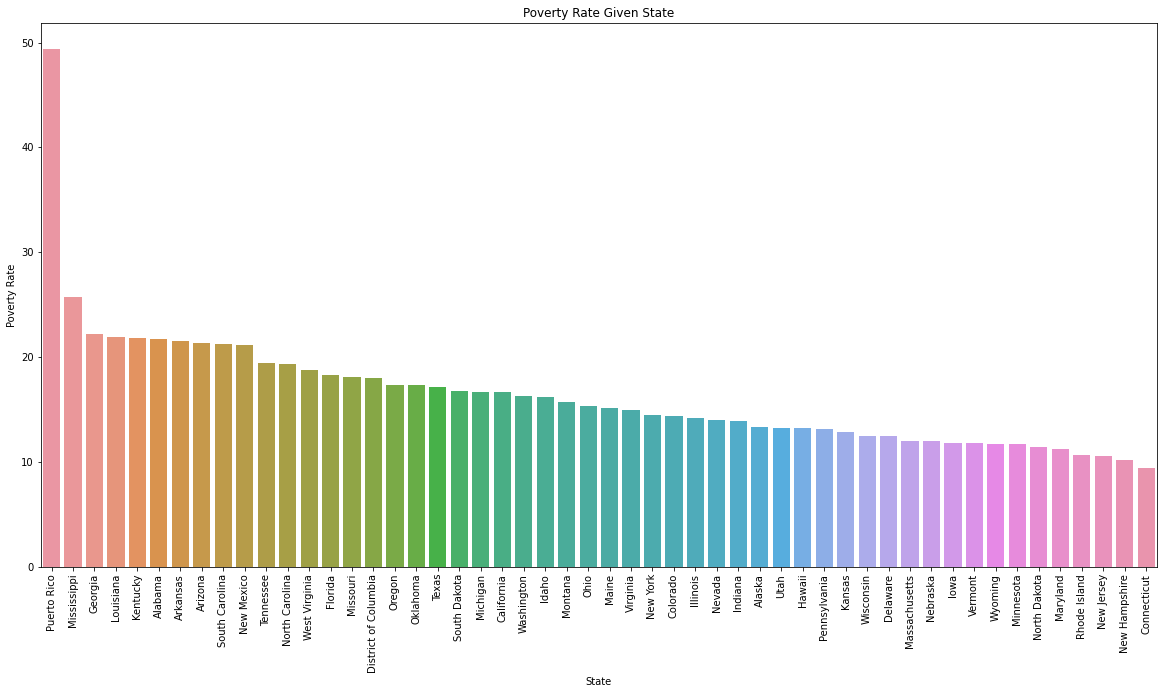

In [12]:
region_list = list(us_census['State'].unique())
state_poverty_ratio = []
for i in region_list:
    x = us_census[us_census['State']==i]                        #Find the state have how many county
    state_poverty_rate = sum(x.Poverty)/len(x)                  #Then you find sum of poverty ratio and divided to found above
    state_poverty_ratio.append(state_poverty_rate)              #You append to list the state
    
   
#sorting    
data = pd.DataFrame({'region_list': region_list,'state_poverty_ratio':state_poverty_ratio})
new_index = (data['state_poverty_ratio'].sort_values(ascending=False)).index.values
sorted_data2 = data.reindex(new_index)

# visualization
plt.figure(figsize=(20,10))
sns.barplot(x=sorted_data2['region_list'], y=sorted_data2['state_poverty_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('State')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given State')

[Text(0, 0.5, 'States'),
 Text(0.5, 0, 'Percentage of Races'),
 Text(0.5, 1.0, "Percentage of State's Population According to Races ")]

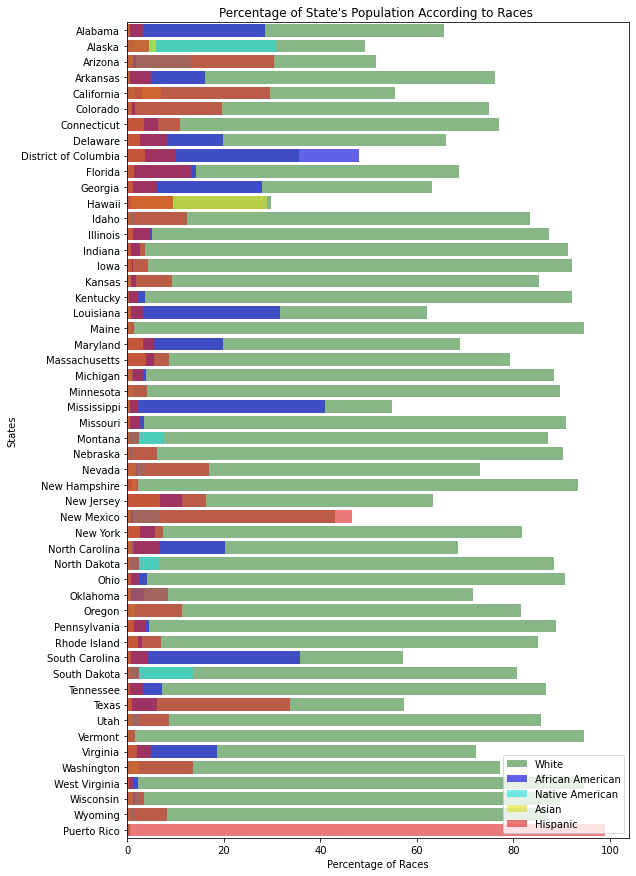

In [13]:
#Horizontal Bar Plot
area_list = list(us_census['State'].unique())

#We create 5 empty list to keep each races
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []

#Find the number of each races in the States
for i in area_list:
    x = us_census[us_census['State']==i]
    share_white.append(sum(x.White)/len(x))
    share_black.append(sum(x.Black) / len(x))
    share_native_american.append(sum(x.Native) / len(x))
    share_asian.append(sum(x.Asian) / len(x))
    share_hispanic.append(sum(x.Hispanic) / len(x))

# visualization
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=share_white,y=area_list,color='green',alpha = 0.5,label='White' )
sns.barplot(x=share_black,y=area_list,color='blue',alpha = 0.7,label='African American')
sns.barplot(x=share_native_american,y=area_list,color='cyan',alpha = 0.6,label='Native American')
sns.barplot(x=share_asian,y=area_list,color='yellow',alpha = 0.6,label='Asian')
sns.barplot(x=share_hispanic,y=area_list,color='red',alpha = 0.6,label='Hispanic')

ax.legend(loc='lower right',frameon = True)     # legendlarin gorunurlugu
ax.set(xlabel='Percentage of Races', ylabel='States',title = "Percentage of State's Population According to Races ")

<a id="2"></a> <br>

In [14]:
data.head()

,region_list,state_poverty_ratio
0,Alabama,21.762687
1,Alaska,13.341379
2,Arizona,21.300000
3,Arkansas,21.552000
4,California,16.670690


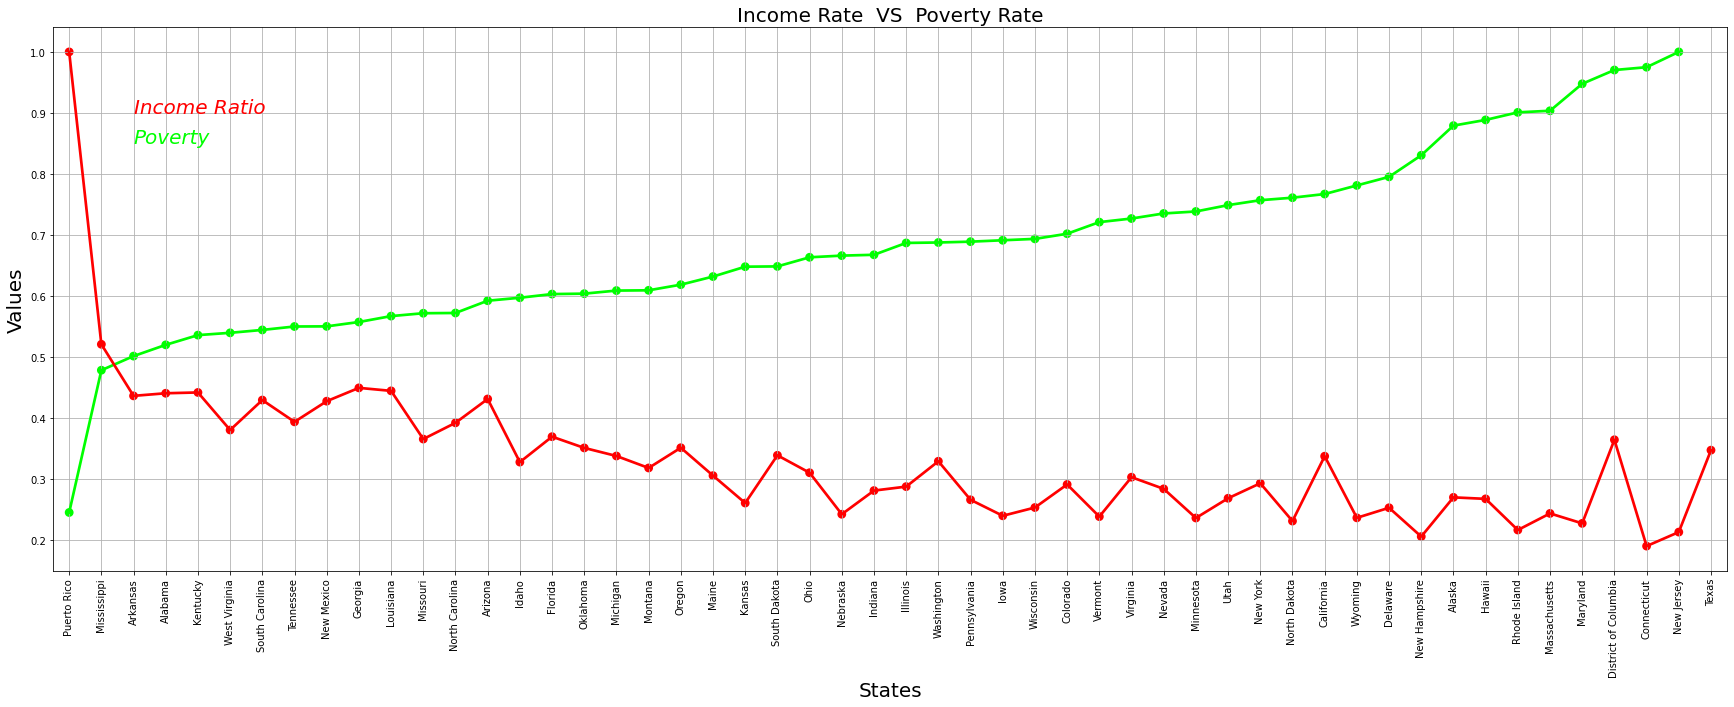

In [15]:
#We use datas above used
#Then make the basic a normalization
sorted_data['region_income_ratio'] = sorted_data['region_income_ratio']/max( sorted_data['region_income_ratio'])
sorted_data2['state_poverty_ratio'] = sorted_data2['state_poverty_ratio']/max( sorted_data2['state_poverty_ratio'])
data = pd.concat([sorted_data,sorted_data2['state_poverty_ratio']],axis=1)
data.sort_values('region_income_ratio',inplace=True)

# visualize
f,ax1 = plt.subplots(figsize =(30,10))
sns.pointplot(x='region_list',y='region_income_ratio',data=data,color='lime',alpha=0.8)
sns.pointplot(x='region_list',y='state_poverty_ratio',data=data,color='red',alpha=0.8)
plt.text(2,0.9,'Income Ratio',color='red',fontsize = 20,style = 'italic')
plt.text(2,0.85,'Poverty',color='lime',fontsize = 20,style = 'italic')
plt.xlabel('States',fontsize = 20,color='black')
plt.xticks(rotation= 90)
plt.ylabel('Values',fontsize = 20,color='black')
plt.title('Income Rate  VS  Poverty Rate',fontsize = 20,color='black')
plt.grid()

<a id="3"></a> <br>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


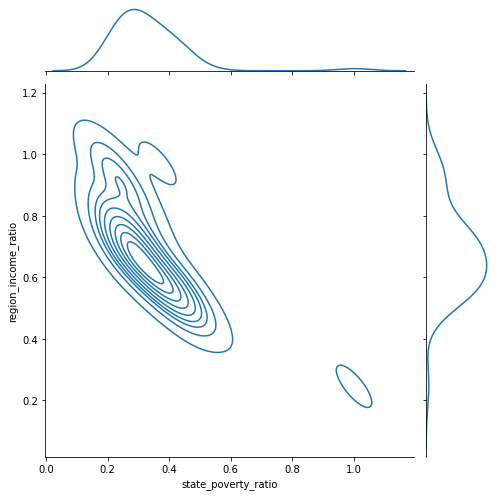

In [16]:
# Joint Plot
# Visualization of region income rate vs state poverty rate of each state with different style of seaborn code# joint kernel density
g = sns.jointplot(data.state_poverty_ratio, data.region_income_ratio, kind="kde", size=7)
plt.savefig('graph.png')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


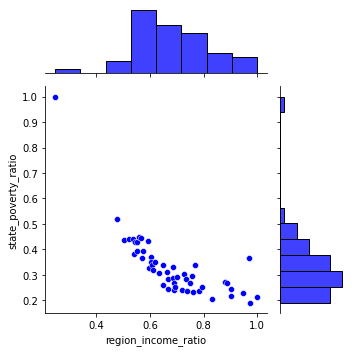

In [17]:
# you can change parameters of joint plot
# We use same datas but we show the technique another way
g = sns.jointplot("region_income_ratio", "state_poverty_ratio", data=data,size=5, ratio=3, color="b")

<a id="4"></a> <br>

In [19]:
data.head()

,region_list,region_income_ratio,state_poverty_ratio
51,Puerto Rico,0.245436,1.000000
24,Mississippi,0.478523,0.520982
3,Arkansas,0.501636,0.436502
0,Alabama,0.520080,0.440769
17,Kentucky,0.536024,0.442082


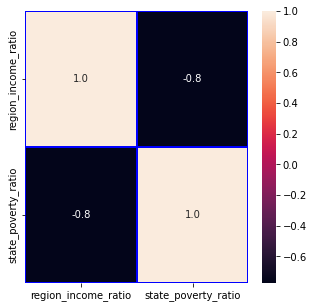

In [21]:
#Heatmap
# Visualization of  Region income rate vs Poverty rate of each state with different style of seaborn code
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(data.corr(), annot=True, linewidths=1,linecolor="blue", fmt= '.1f',ax=ax)
plt.show()